Import All The Necessary Libraries


In [19]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Load and Explore Data

In [10]:
# Step 1: Load and explore data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the dataset
print("Train data preview:")
print("--------------------------------------")
print(train_data.head())
print("\n Test data preview:")
print("---------------------------------------")
print(test_data.head())

Train data preview:
--------------------------------------
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold 

Data Preprocessing

In [11]:
# Step 2: Data preprocessing (handling missing values if any)
# Check for missing values in both train and test datasets
print("\n Missing values in training data:")
print("------------------------------------")
print(train_data.isnull().sum())
print("\n Missing values in test data:")
print("--------------------------------")
print(test_data.isnull().sum())


# Filling missing values with mean for numeric columns
numeric_cols_train = train_data.select_dtypes(include=np.number).columns.tolist()
train_data[numeric_cols_train] = train_data[numeric_cols_train].fillna(train_data[numeric_cols_train].mean())

numeric_cols_test = test_data.select_dtypes(include=np.number).columns.tolist()
test_data[numeric_cols_test] = test_data[numeric_cols_test].fillna(test_data[numeric_cols_test].mean())



 Missing values in training data:
------------------------------------
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

 Missing values in test data:
--------------------------------
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


Feature Selection

In [12]:
# Step 3: Feature selection
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = train_data[features]
y = train_data[target]


# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building

In [13]:
# Step 4: Model building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation on Training and Validation Data

In [14]:
# Step 5: Model evaluation on training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)

print("Model Evaluation:")
print("--------------------------------------")
print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")
print(f"Validation RMSE: {val_rmse}")
print(f"Validation MAE: {val_mae}")


Model Evaluation:
--------------------------------------
Training RMSE: 50924.807621834334
Training MAE: 34917.38695768715
Validation RMSE: 52975.71771338122
Validation MAE: 35788.0612924363


Prediction on testing Data

In [17]:
# Step 6: Prediction on testing data
X_test = test_data[features]
y_test_pred = model.predict(X_test)


# Output Predictions for Test Set
predictions = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_test_pred})
predictions.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")
print("------------------------------------\n")

# Display the first few rows of the generated CSV file
print("Few rows of predictions.csv file")
print(predictions.head())

Predictions saved to predictions.csv
------------------------------------

Few rows of predictions.csv file
     Id      SalePrice
0  1461  122173.313104
1  1462  140561.538683
2  1463  201783.754896
3  1464  199183.097221
4  1465  192133.739106


Scatter Plot of Actual vs Predicted SalePrice on Training and Validation Data

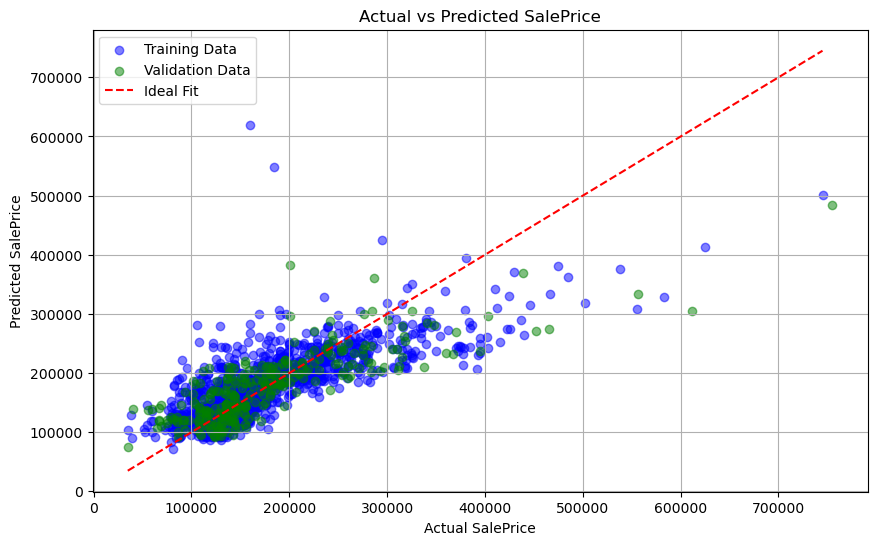

In [18]:
# Scatter plot of Actual vs Predicted SalePrice on the training and validation data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Training Data')
plt.scatter(y_val, y_val_pred, color='green', alpha=0.5, label='Validation Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.grid(True)
plt.show()